In [1]:
%matplotlib inline

# math and data manipulation
import numpy as np
import pandas as pd

# to handle paths
from pathlib import Path

# set random seeds 
from numpy.random import seed
from tensorflow import set_random_seed

from sklearn.preprocessing import MinMaxScaler

from csef.model import lstm
from csef.data import preprocessing, load_data
from csef.utils import performance
from csef.model.base import GeneralModel

RANDOM_SEED = 2018
seed(RANDOM_SEED)
set_random_seed(RANDOM_SEED)

/home/thuongdinh/.virtualenvs/mlcsef/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## Data Loading

In [2]:
data_mapping = load_data.load_data()
consumption_train = data_mapping['consumption_train']
cold_start_test = data_mapping['cold_start_test']
submission_format = data_mapping['submission_format']
meta = data_mapping['meta']

In [3]:
samp_df = load_data.sampling_data(consumption_train, frac=0.1)

In [4]:
load_data.describe_training_data(samp_df)

There are 81 training series totaling 2268 days (54432 hours) of consumption data.


## Training

In [5]:
train_df, test_df = load_data.train_test_split(samp_df)

/home/thuongdinh/ws/asnet-training/ml-training/ml-energy-forecasting/csef/data/load_data.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  split_train[group_col] = ser_id
/home/thuongdinh/ws/asnet-training/ml-training/ml-energy-forecasting/csef/data/load_data.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  split_test[group_col] = ser_id


In [6]:
load_data.describe_training_data(train_df)

There are 81 training series totaling 2268 days (54432 hours) of consumption data.


In [7]:
# Default config
n_batch = 1
n_input = 24
n_nodes = 24

batch_input_shape = (n_batch, 1, n_input)

## Baseline

In [8]:
config = {
    'n_input': n_input,
    'n_nodes': n_nodes,
    'n_batch': n_batch,
    'model': [
        {
            'layer_type': 'LSTM',
            'layer_config': {
                'units': n_input,
                'batch_input_shape': batch_input_shape,
                'stateful': True
            }
        },
        {
            'layer_type': 'Dense',
            'layer_config': {
                'units': 1
            }
        }
    ]
}

In [9]:
scores = performance.repeat_evaluate(GeneralModel, train_df, test_df, config, n_repeats=5)

Fitting the data: 100%|██████████| 81/81 [01:51<00:00,  1.35s/it]


Id: 100040, Error: 105436.87695503794
Id: 100200, Error: 12011.791545921073
Id: 100214, Error: 11648.376242062062
Id: 100244, Error: 39226.00125035294
Id: 100283, Error: 71147.01618098469
Id: 100288, Error: 8294.243328336845
Id: 100363, Error: 14465.78699566355
Id: 100419, Error: 24372.962954879156
Id: 100421, Error: 30353.977230223973
Id: 100425, Error: 6782.58843057948
Id: 100490, Error: 1878.7490973356041
Id: 100525, Error: 1837.6540101393314
Id: 100532, Error: 4118.55547817711
Id: 100534, Error: 5089.945933027598
Id: 100607, Error: 107165.70700263647
Id: 100632, Error: 11124.982995803775
Id: 100684, Error: 152604.09575526914
Id: 100709, Error: 15969.329928490632
Id: 100737, Error: 14602.150603715803
Id: 100819, Error: 498.70643349510755
Id: 100841, Error: 3101.37254738168
Id: 100854, Error: 2533.454396817879
Id: 100887, Error: 1236.120562206424
Id: 100973, Error: 2242.657812716512
Id: 100998, Error: 1324.7106003795304
Id: 101030, Error: 7039.867532073374
Id: 101107, Error: 35327.36

Fitting the data:   0%|          | 0/81 [00:00<?, ?it/s]

Id: 103625, Error: 23569.058731764042
 > 19573.542


Fitting the data: 100%|██████████| 81/81 [01:53<00:00,  1.46s/it]


Id: 100040, Error: 71512.91723064036
Id: 100200, Error: 11321.161914357013
Id: 100214, Error: 12074.40916041979
Id: 100244, Error: 32179.59831592358
Id: 100283, Error: 56710.89771234418
Id: 100288, Error: 8211.068073675284
Id: 100363, Error: 14476.050780799582
Id: 100419, Error: 16545.40228786205
Id: 100421, Error: 22280.51907048631
Id: 100425, Error: 7141.1887288190965
Id: 100490, Error: 1953.5386003212034
Id: 100525, Error: 1793.2419774757745
Id: 100532, Error: 4157.541815832507
Id: 100534, Error: 6017.8644757516295
Id: 100607, Error: 109888.77111689367
Id: 100632, Error: 12853.112273471887
Id: 100684, Error: 155824.3549041166
Id: 100709, Error: 15854.55684321089
Id: 100737, Error: 19144.25284449216
Id: 100819, Error: 574.2893384897463
Id: 100841, Error: 3186.4195329621784
Id: 100854, Error: 2548.2912704658697
Id: 100887, Error: 1238.1267902493803
Id: 100973, Error: 2489.260233882412
Id: 100998, Error: 1358.3316540021383
Id: 101030, Error: 7559.487748063173
Id: 101107, Error: 44011.0

Fitting the data: 100%|██████████| 81/81 [01:57<00:00,  1.58s/it]


Id: 100040, Error: 75393.63706090699
Id: 100200, Error: 8811.547206671012
Id: 100214, Error: 12908.029461667713
Id: 100244, Error: 41465.574933865464
Id: 100283, Error: 67033.27220115419
Id: 100288, Error: 8514.886518129793
Id: 100363, Error: 14492.60281407088
Id: 100419, Error: 18612.664561842656
Id: 100421, Error: 25684.545730719474
Id: 100425, Error: 7037.705488379969
Id: 100490, Error: 1927.1202066548792
Id: 100525, Error: 1668.3754756236085
Id: 100532, Error: 4323.148319010815
Id: 100534, Error: 5786.53702027023
Id: 100607, Error: 111853.43558199238
Id: 100632, Error: 13147.661440999022
Id: 100684, Error: 157767.07108356754
Id: 100709, Error: 15440.80780038436
Id: 100737, Error: 17851.437803408306
Id: 100819, Error: 609.3282774257515
Id: 100841, Error: 3499.961914709695
Id: 100854, Error: 2539.139957034555
Id: 100887, Error: 1269.148158237974
Id: 100973, Error: 2703.0374710407555
Id: 100998, Error: 1411.1149949601913
Id: 101030, Error: 7444.9487303368705
Id: 101107, Error: 40947.6

Fitting the data:   0%|          | 0/81 [00:00<?, ?it/s]

Id: 103625, Error: 20389.012261762527
 > 18735.022


Fitting the data: 100%|██████████| 81/81 [01:52<00:00,  1.37s/it]


Id: 100040, Error: 86886.37361790975
Id: 100200, Error: 8322.949559567287
Id: 100214, Error: 12292.273805953133
Id: 100244, Error: 39978.38139024549
Id: 100283, Error: 113881.37205290627
Id: 100288, Error: 7822.232852618319
Id: 100363, Error: 14345.955279838745
Id: 100419, Error: 20537.07085418823
Id: 100421, Error: 31372.727764669256
Id: 100425, Error: 6141.180626282291
Id: 100490, Error: 2261.104080473824
Id: 100525, Error: 1701.8237350098113
Id: 100532, Error: 4321.438778004825
Id: 100534, Error: 5590.787384291318
Id: 100607, Error: 111538.36288143655
Id: 100632, Error: 13449.320541383006
Id: 100684, Error: 150529.56540367176
Id: 100709, Error: 12789.728231951542
Id: 100737, Error: 16222.472536770167
Id: 100819, Error: 672.4087186527973
Id: 100841, Error: 3817.9752906630943
Id: 100854, Error: 2511.9045856825637
Id: 100887, Error: 1332.858827627498
Id: 100973, Error: 2643.0463441841825
Id: 100998, Error: 1415.686926347297
Id: 101030, Error: 8055.084225377133
Id: 101107, Error: 45206.

Fitting the data:   0%|          | 0/81 [00:00<?, ?it/s]

Id: 103625, Error: 21299.99126419704
 > 19740.130


Fitting the data: 100%|██████████| 81/81 [01:55<00:00,  1.38s/it]


Id: 100040, Error: 68139.81809502572
Id: 100200, Error: 10037.191573530472
Id: 100214, Error: 12253.139633005483
Id: 100244, Error: 35676.51260651145
Id: 100283, Error: 74191.54207323998
Id: 100288, Error: 9221.216121521255
Id: 100363, Error: 14489.588802273458
Id: 100419, Error: 14909.082069672773
Id: 100421, Error: 26789.609063022053
Id: 100425, Error: 7457.103235045183
Id: 100490, Error: 1979.6354441851797
Id: 100525, Error: 1736.1699195676363
Id: 100532, Error: 3794.5524290805915
Id: 100534, Error: 5058.509196168652
Id: 100607, Error: 111848.29913806083
Id: 100632, Error: 12437.009651918566
Id: 100684, Error: 162838.9799354372
Id: 100709, Error: 17619.208834207897
Id: 100737, Error: 18574.2662303816
Id: 100819, Error: 574.1446538035107
Id: 100841, Error: 2895.7535347148773
Id: 100854, Error: 2549.6670289445424
Id: 100887, Error: 1217.7776626602547
Id: 100973, Error: 2396.5163424378047
Id: 100998, Error: 1394.2689183448813
Id: 101030, Error: 7753.815080837706
Id: 101107, Error: 3818

lstm: 19121.340 RMSE (+/- 443.070)


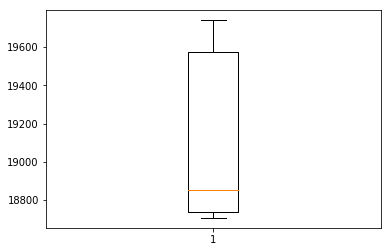

In [10]:
performance.summarize_scores('lstm', [score[0] for score in scores])